# Distribution generation

In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt
import proplot as plot

sys.path.append('/Users/46h/Research/code/accphys')
from tools import (
    plotting as myplt, 
    envelope_analysis as ea,
)
plot.rc['figure.facecolor'] = 'white'

<xy'> - <yx'> = 0.71
4D Twiss parameters:
    mode = 1
    e1 = 1.000e+00 [m*rad]
    ax, ay = -0.000, -0.000 [rad]
    bx, by = 1.000, 1.000 [m]
    u = 0.500
    nu = 45.000 [deg]
2D Twiss parameters:
    ax, ay = -0.000, -0.000 [rad]
    bx, by = 2.000, 2.000 [m]
    ex, ey = 5.000e-01, 5.000e-01 [m*rad]


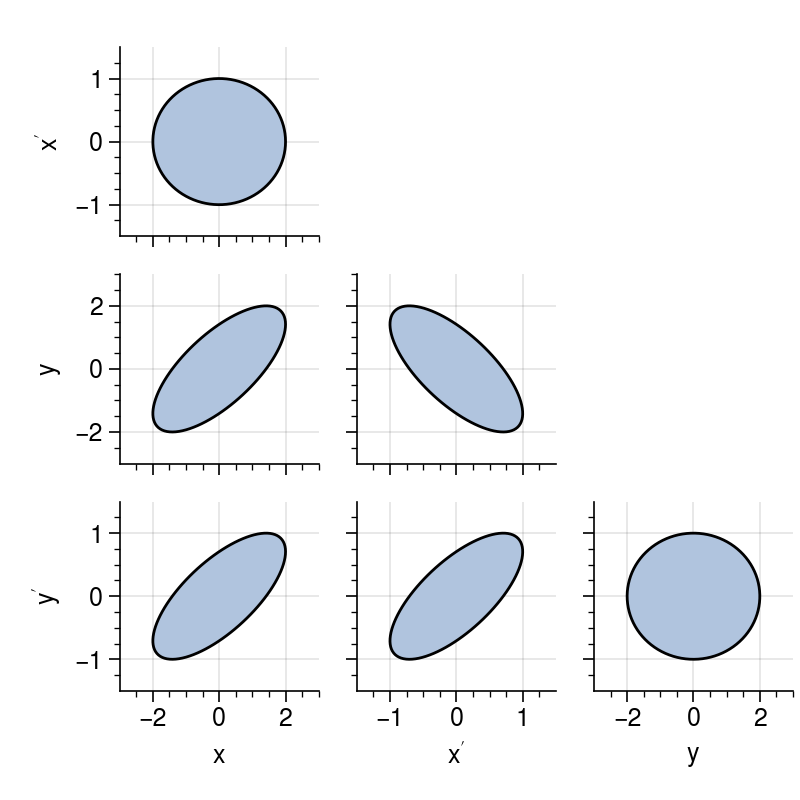

In [12]:
env = ea.Envelope(mode=1)
ax, ay = 0, 0
bx, by = 1, 1
u = 0.5
nu = 0.25 * np.pi
env.fit_twiss4D([ax, ay, bx, by, u, nu])
myplt.corner_env(env.params, figsize=4, fill=True, units=None);

Sigma = env.cov()
print("<xy'> - <yx'> = {:.2f}".format(Sigma[0, 3] - Sigma[1, 2]))
env.print_twiss4D()
env.print_twiss2D()

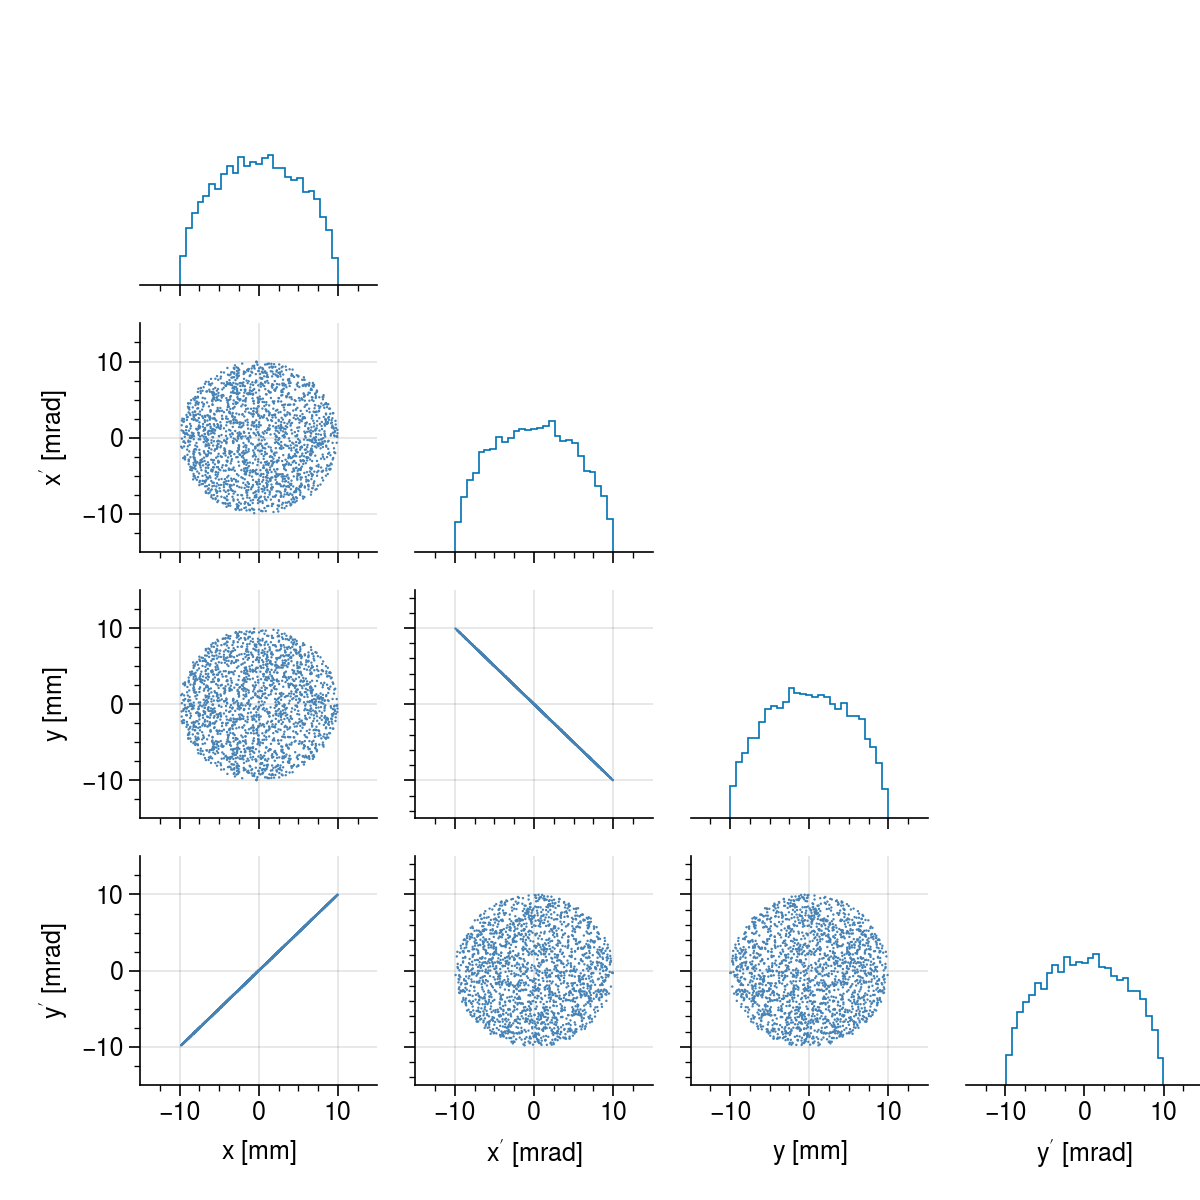

In [6]:
nparts = int(1e4)
env = ea.Envelope(eps=50, mode=1)

X = env.generate_dist(nparts)
axes = myplt.corner(X);
plt.savefig('danilov_dist.png', facecolor='white', dpi=500)